In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

import cfod
from cfod import catalog
from cfod.routines import waterfaller

import h5py
import scipy
import wget

#Goal:

- find first burst repeaters
- streamline getting the graphs out
- find way of getting the data files (not manually) -> wget usage maybe

In [2]:
data = catalog.as_dataframe()
data

,tns_name,previous_name,repeater_name,ra,ra_err,ra_notes,dec,dec_err,dec_notes,gl,...,width_fitb,width_fitb_err,sp_idx,sp_idx_err,sp_run,sp_run_err,high_freq,low_freq,peak_freq,excluded_flag
0,FRB20180725A,180725.J0613+67,-9999,93.42,0.039,-9999,67.07,0.210,-9999,147.29,...,0.000296,0.000076,38.20,3.70,-45.80,4.20,760.1,485.3,607.4,1
1,FRB20180727A,180727.J1311+26,-9999,197.72,0.130,-9999,26.42,0.260,-9999,24.76,...,0.00139,0.000170,3.80,1.80,-9.20,3.00,800.2,400.2,493.3,1
2,FRB20180729A,180729.J1316+55,-9999,199.40,0.120,-9999,55.58,0.084,-9999,115.26,...,<0.00010,-9999.000000,16.46,0.24,-30.21,0.38,692.7,400.2,525.6,1
3,FRB20180729B,180729.J0558+56,-9999,89.93,0.270,-9999,56.50,0.240,-9999,156.90,...,0.000314,0.000083,14.50,3.50,-14.60,3.50,800.2,441.8,657.5,1
4,FRB20180730A,180730.J0353+87,-9999,57.39,0.032,-9999,87.19,0.200,-9999,125.11,...,0.000468,0.000040,4.27,0.30,-11.31,0.48,759.2,400.2,483.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,FRB20190701A,-9999,-9999,277.47,0.210,-9999,59.04,0.220,-9999,88.29,...,0.000608,0.000057,-1.10,1.50,3.30,1.90,800.2,400.2,800.2,0
596,FRB20190701B,-9999,-9999,302.93,0.220,-9999,80.18,0.240,-9999,112.88,...,0.00063,0.000130,3.90,1.70,-11.80,3.10,732.8,400.2,471.5,0
597,FRB20190701C,-9999,-9999,96.36,0.230,-9999,81.63,0.270,-9999,132.18,...,0.00144,0.000160,46.20,9.00,-211.00,41.00,495.5,402.2,446.4,0
598,FRB20190701D,-9999,-9999,112.10,0.180,-9999,66.70,0.160,-9999,149.28,...,0.00140,0.000120,6.49,0.75,-20.90,1.60,651.8,400.2,467.6,0


In [3]:
specific_burst = data[data['tns_name'] =="FRB20180727A"]
specific_burst

,tns_name,previous_name,repeater_name,ra,ra_err,ra_notes,dec,dec_err,dec_notes,gl,...,width_fitb,width_fitb_err,sp_idx,sp_idx_err,sp_run,sp_run_err,high_freq,low_freq,peak_freq,excluded_flag
1,FRB20180727A,180727.J1311+26,-9999,197.72,0.13,-9999,26.42,0.26,-9999,24.76,...,0.00139,0.00017,3.8,1.8,-9.2,3.0,800.2,400.2,493.3,1


In [4]:
data["tns_name"][2]

'FRB20180729A'

In [5]:
#find the download url for a burst given its tns_name from the Data table.

example_tns = data["tns_name"][577]

url_base = "https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/"
waterfall_string = '_waterfall.h5'

url = url_base + example_tns +waterfall_string
print(url)

https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20190625E_waterfall.h5


In [6]:
Data_from_url = wget.download(url)
#Data_from_url

In [7]:
#plot_file = 'FRB20180725A_waterfall.h5'
data = h5py.File(Data_from_url, "r")


In [8]:
list(data["frb"].keys())


['calibrated_wfall',
 'extent',
 'model_spec',
 'model_ts',
 'model_wfall',
 'plot_freq',
 'plot_time',
 'spec',
 'ts',
 'wfall']

In [9]:
data = data["frb"]
eventname = data.attrs["tns_name"].decode()
wfall = data["wfall"][:]
model_wfall = data["model_wfall"][:]
plot_time = data["plot_time"][:]
plot_freq = data["plot_freq"][:]
ts = data["ts"][:]
model_ts = data["model_ts"][:]
spec = data["spec"][:]
model_spec = data["model_spec"][:]
extent = data["extent"][:]
dm = data.attrs["dm"][()]
scatterfit = data.attrs["scatterfit"][()]
cal_obs_date = data.attrs["calibration_observation_date"].decode()
cal_source_name = data.attrs["calibration_source_name"].decode()
cal_wfall =  data["calibrated_wfall"][:]

dt = np.median(np.diff(plot_time)) # the delta (time) between time bins 
# dt in mu s
# this value is the same for both caliberated and uncalibrated data


In [10]:
ts_with_RFI = ts

In [11]:
q1 = np.nanquantile(spec, 0.25)
q3 = np.nanquantile(spec, 0.75)
iqr = q3 - q1

# additional masking of channels with RFI
rfi_masking_var_factor = 3

channel_variance = np.nanvar(wfall, axis=1)
mean_channel_variance = np.nanmean(channel_variance)

with np.errstate(invalid="ignore"):
    rfi_mask = (channel_variance > \
                rfi_masking_var_factor * mean_channel_variance) \
                | (spec[::-1] < q1 - 1.5 * iqr) | (spec[::-1] > q3 + 1.5 * iqr)
wfall[rfi_mask,...] = np.nan
model_wfall[rfi_mask,...] = np.nan
spec[rfi_mask[::-1]] = np.nan

# remake time-series after RFI masking
ts = np.nansum(wfall, axis=0)
model_ts = np.nansum(model_wfall, axis=0)


<ipython-input-11-31fc115817a1>:8: RuntimeWarning: Degrees of freedom <= 0 for slice.
  channel_variance = np.nanvar(wfall, axis=1)


RFI removal paper by the group to understand this further?

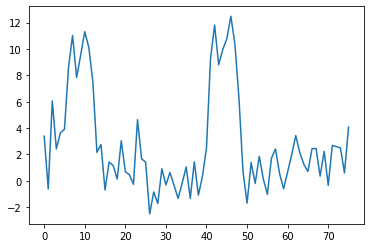

In [12]:
plt.plot(ts-ts_with_RFI)

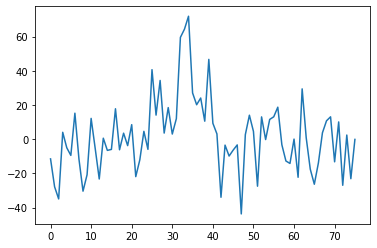

In [13]:
plt.plot(ts)

In [14]:
def boxcar_kernel(width):
    width = int(round(width, 0))
    return np.ones(width, dtype="float32") / np.sqrt(width)


def find_burst(ts, min_width=1, max_width=128):
    min_width = int(min_width)
    max_width = int(max_width)
    # do not search widths bigger than timeseries
    widths = list(range(min_width, min(max_width + 1, len(ts)-2)))
    # envelope finding
    snrs = np.empty_like(widths, dtype=float)
    peaks = np.empty_like(widths, dtype=int)
    for i in range(len(widths)):
        convolved = scipy.signal.convolve(ts, boxcar_kernel(widths[i]), mode="same")
        peaks[i] = np.nanargmax(convolved)
        snrs[i] = convolved[peaks[i]]
    best_idx = np.nanargmax(snrs)
    return peaks[best_idx], widths[best_idx], snrs[best_idx]


In [15]:
peak, width, snr = find_burst(ts)
print(f"Peak: {peak} at time sample, Width = {width*dt} ms, SNR = {snr}")


Peak: 32 at time sample, Width = 14.745599910384044 ms, SNR = 116.17487573033992


In [16]:
def bin_freq_channels(data, fbin_factor=4):
    num_chan = data.shape[0]
    if num_chan % fbin_factor != 0:
        raise ValueError("frequency binning factor `fbin_factor` should be even")
    data = np.nanmean(data.reshape((num_chan // fbin_factor, fbin_factor) + data.shape[1:]), axis=1)
    return data


In [17]:
# bin frequency channels such that we have 16,384/16 = 1024 frequency channels 
wfall = bin_freq_channels(wfall, 16)


<ipython-input-16-567b23084d7b>:5: RuntimeWarning: Mean of empty slice
  data = np.nanmean(data.reshape((num_chan // fbin_factor, fbin_factor) + data.shape[1:]), axis=1)


Text(0.5, 0, 'Time [ms]')

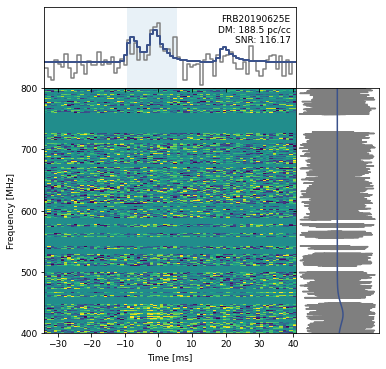

In [18]:
fig = plt.figure(figsize=(6,6))
## Set up the image grid
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, width_ratios=[3, 1],
                        height_ratios=[1, 3], hspace=0.0, wspace=0.0)
data_im = plt.subplot(gs[2])
data_ts = plt.subplot(gs[0], sharex=data_im)
data_spec = plt.subplot(gs[3], sharey=data_im)


### time stamps relative to the peak
peak_idx = np.argmax(ts)
extent[0] = extent[0] - plot_time[peak_idx]
extent[1] = extent[1] - plot_time[peak_idx]
plot_time -= plot_time[peak_idx]

# prepare time-series for histogramming
plot_time -= dt / 2.
plot_time = np.append(plot_time, plot_time[-1] + dt)

cmap = plt.cm.viridis

### plot dynamic spectrum
wfall[np.isnan(wfall)] = np.nanmedian(wfall)   # replace nans in the data with the data median
# use standard deviation of residuals to set color scale
vmin = np.nanpercentile(wfall, 1)
vmax = np.nanpercentile(wfall, 99)

data_im.imshow(wfall, aspect="auto", interpolation="none",
                extent=extent, vmin=vmin, vmax=vmax, cmap=cmap)

### plot time-series
data_ts.plot(plot_time, np.append(ts, ts[-1]), color="tab:gray",
                drawstyle="steps-post")

### plot spectrum
data_spec.plot(spec, plot_freq, color="tab:gray")

### plot model time-series and spectrum
if scatterfit:
    data_spec.plot(model_spec, plot_freq, color=cmap(0.25))
    data_ts.plot(plot_time, np.append(model_ts, model_ts[-1]),
                    color=cmap(0.25), drawstyle="steps-post", lw=2)
else:
    data_spec.plot(model_spec, plot_freq, color=cmap(0.5))
    data_ts.plot(plot_time, np.append(model_ts, model_ts[-1]),
                    color=cmap(0.5), drawstyle="steps-post", lw=1)


## BEautify plot
# remove some labels and ticks for neatness
plt.setp(data_ts.get_xticklabels(), visible=False)
data_ts.set_yticklabels([], visible=True)
data_ts.set_yticks([])
data_ts.set_xlim(extent[0], extent[1])
plt.setp(data_spec.get_yticklabels(), visible=False)
data_spec.set_xticklabels([], visible=True)
data_spec.set_xticks([])
data_spec.set_ylim(extent[2], extent[3])
plt.setp(data_im.get_xticklabels(), fontsize=9)
plt.setp(data_im.get_yticklabels(), fontsize=9)


#### highlighting the width of the pulse
data_ts.axvspan(max(plot_time.min(),
                        plot_time[peak] + 0.5 * dt \
                        - (0.5 * width) * dt),
                    min(plot_time.max(),
                        plot_time[peak] + 0.5 * dt \
                        + (0.5 * width) * dt),
                    facecolor="tab:blue", edgecolor=None, alpha=0.1)


##### add event ID and DM labels
xlim = data_ts.get_xlim()
ylim = data_ts.get_ylim()

# add 20% extra white space at the top
span = np.abs(ylim[1]) + np.abs(ylim[0])
data_ts.set_ylim(ylim[0], ylim[1] + 0.2 * span)
ylim = data_ts.get_ylim()

ypos = (ylim[1] - ylim[0]) * 0.9 + ylim[0]
xpos = (xlim[1] - xlim[0]) * 0.98 + extent[0]
data_ts.text(xpos, ypos, "{}\nDM: {:.1f} pc/cc\nSNR: {:.2f}".format(eventname, dm,snr), ha="right",
                va="top", fontsize=9)

data_im.locator_params(axis="x", min_n_ticks=3)
data_im.set_yticks([400, 500, 600, 700, 800])
data_im.set_ylabel("Frequency [MHz]", fontsize=9)
data_im.set_xlabel("Time [ms]", fontsize=9)


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

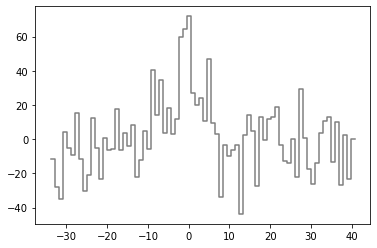

In [19]:
plt.plot(plot_time, np.append(ts, ts[-1]), color="tab:gray", drawstyle="steps-post")
plt.imshow

In [20]:
cal_ts = np.nanmean(cal_wfall, axis = 0)


Text(0, 0.5, 'Flux [Jy]')

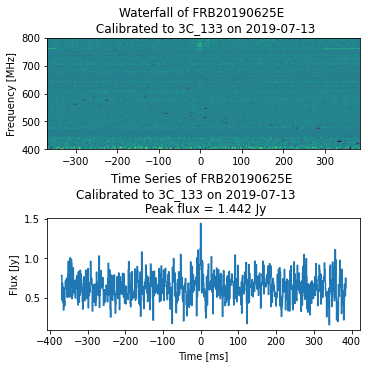

In [21]:
cal_wfall[np.isnan(cal_wfall)] = np.nanmedian(cal_wfall)   # replace nans in the data with the data median
#bin frequency channels such that we have 16,384/16 = 1024 frequency channels 
cal_wfall = bin_freq_channels(cal_wfall,16) 
vmin = np.nanpercentile(cal_wfall, 1)
vmax = np.nanpercentile(cal_wfall, 99)

times = np.arange(len(cal_ts))*dt
peak_idx = np.argmax(cal_ts)
times -= times[peak_idx]
times -= dt / 2.

extent[0] = times[0]
extent[1] = times[-1]

fig = plt.figure(figsize=(5,5), constrained_layout=True)
layout = """
A
C
"""
ax_dict = fig.subplot_mosaic(layout)
ax_dict["A"].imshow(cal_wfall, aspect="auto", vmin=vmin,vmax=vmax, extent = extent )
ax_dict["A"].set_title(f"Waterfall of {eventname} \n Calibrated to {cal_source_name} on {cal_obs_date}")
ax_dict["A"].set_yticks([400, 500, 600, 700, 800])
ax_dict["C"].plot(times,cal_ts, drawstyle="steps-post")
ax_dict["C"].set_xlabel("Time [ms]")
ax_dict["C"].set_title(f"Time Series of {eventname} \nCalibrated to {cal_source_name} on {cal_obs_date} \
        \n Peak flux = {cal_ts[peak_idx]:.3f} Jy")
ax_dict["A"].set_ylabel("Frequency [MHz]")
ax_dict["C"].set_ylabel("Flux [Jy]")
